In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import time
import pickle

In [2]:
tracks = pd.read_csv("./data/cleaned_data_mil.csv")

In [3]:
track_data = tracks.copy()

encoder = LabelEncoder()
track_data['genre'] = encoder.fit_transform(track_data['genre'])

features = track_data[['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 
                       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                       'time_signature']]
target = track_data['genre']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The best model with n_neighbors=60 and accuracy=0.5339516000636841 has been saved as 'best_knn_model.pkl'.
   n_neighbors  accuracy  precision_micro  recall_micro  f1_micro  \
0           20  0.530091         0.530091      0.530091  0.530091   
1           50  0.533494         0.533494      0.533494  0.533494   
2           60  0.533952         0.533952      0.533952  0.533952   
3           70  0.533454         0.533454      0.533454  0.533454   
4          100  0.533295         0.533295      0.533295  0.533295   

   precision_macro  recall_macro  f1_macro        time  
0         0.526608      0.524047  0.523291  156.098306  
1         0.531462      0.523533  0.524865  188.193938  
2         0.532314      0.523099  0.524996  191.105496  
3         0.531620      0.521788  0.523688  200.123188  
4         0.531884      0.519714  0.522357  219.483455  


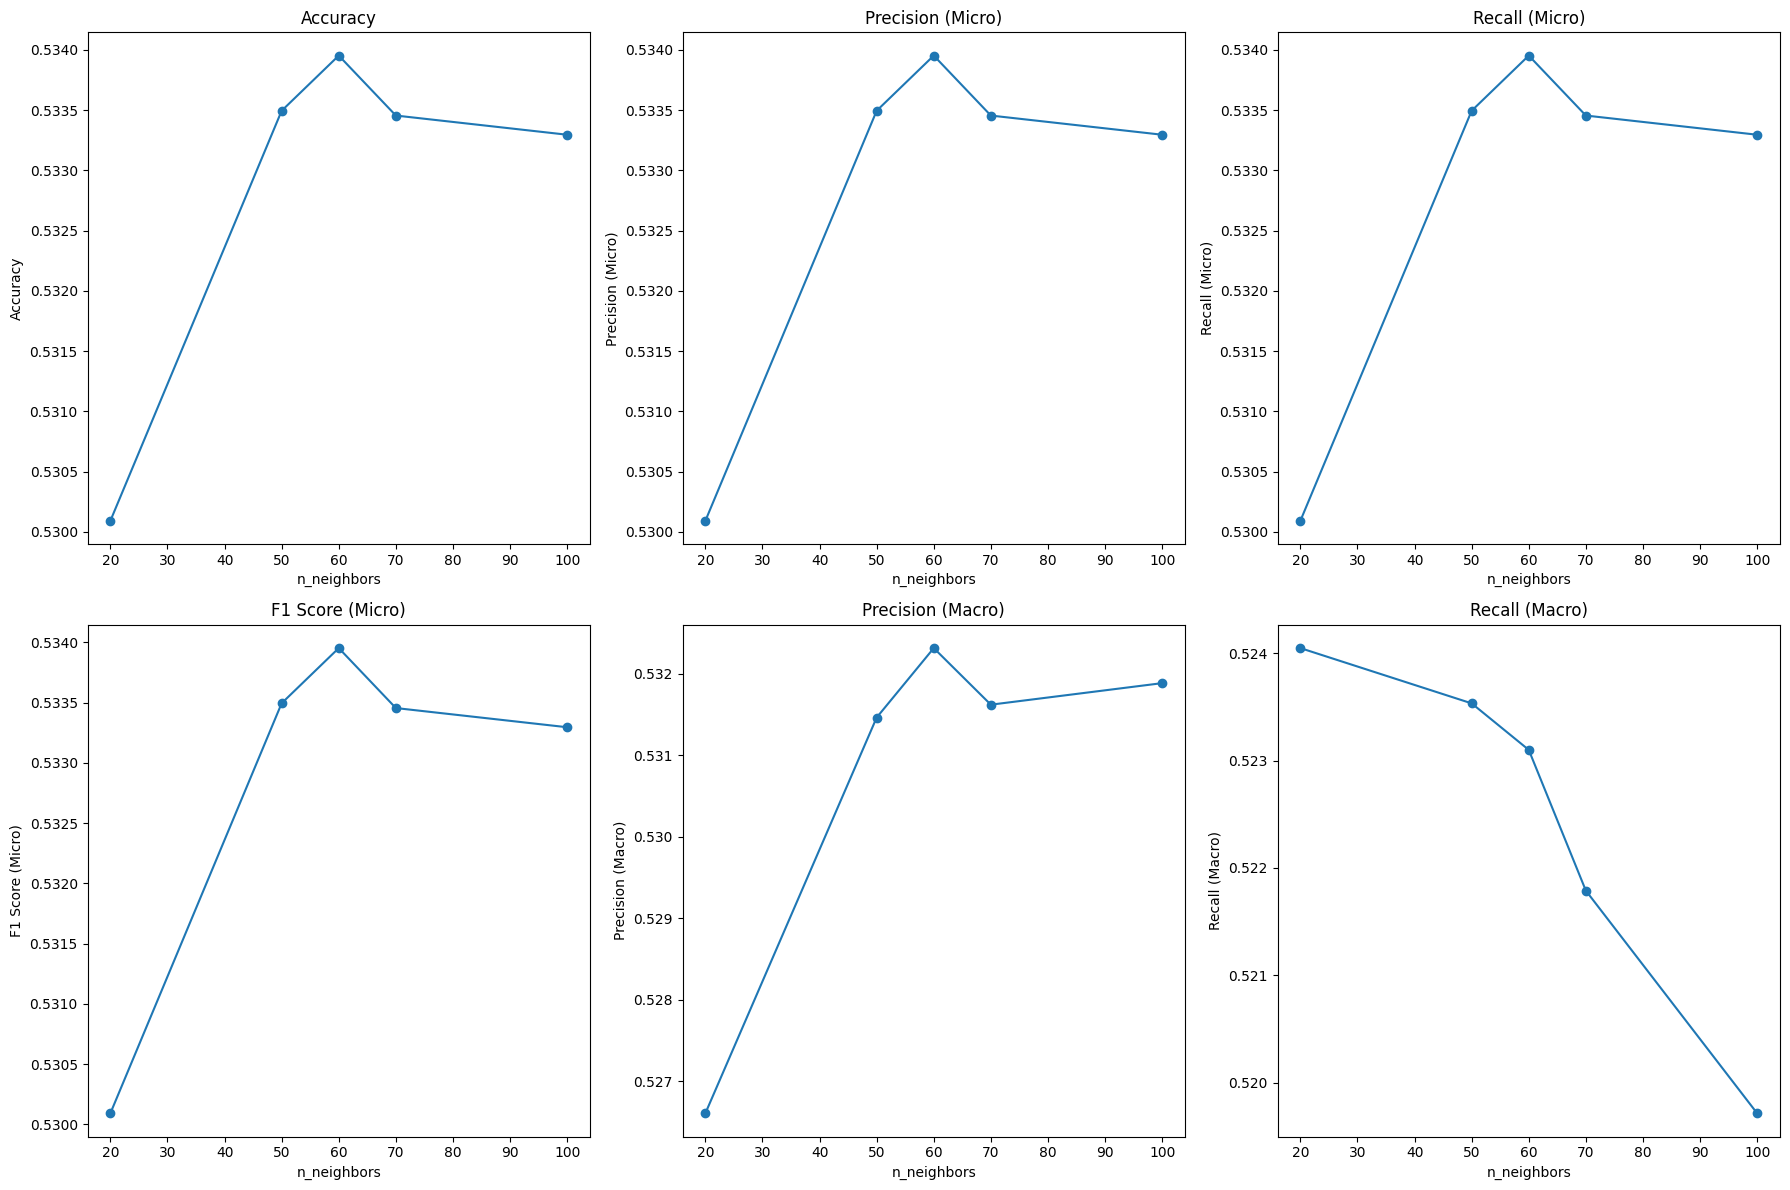

In [7]:
n_neighbors_list = [20, 50, 60, 70, 100]

results = {
    'n_neighbors': [],
    'accuracy': [],
    'precision_micro': [],
    'recall_micro': [],
    'f1_micro': [],
    'precision_macro': [],
    'recall_macro': [],
    'f1_macro': [],
    'time': []
}

best_accuracy = 0
best_model = None
best_n_neighbors = 0

for n in n_neighbors_list:
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    end_time = time.time()
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    
    results['n_neighbors'].append(n)
    results['accuracy'].append(accuracy)
    results['precision_micro'].append(precision_micro)
    results['recall_micro'].append(recall_micro)
    results['f1_micro'].append(f1_micro)
    results['precision_macro'].append(precision_macro)
    results['recall_macro'].append(recall_macro)
    results['f1_macro'].append(f1_macro)
    results['time'].append(end_time - start_time)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = knn
        best_n_neighbors = n

results_df = pd.DataFrame(results)

with open('./data/best_knn_model_mil.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"The best model with n_neighbors={best_n_neighbors} and accuracy={best_accuracy} has been saved as 'best_knn_model.pkl'.")

print(results_df)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0, 0].plot(results['n_neighbors'], results['accuracy'], marker='o')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('n_neighbors')
axs[0, 0].set_ylabel('Accuracy')

axs[0, 1].plot(results['n_neighbors'], results['precision_micro'], marker='o')
axs[0, 1].set_title('Precision (Micro)')
axs[0, 1].set_xlabel('n_neighbors')
axs[0, 1].set_ylabel('Precision (Micro)')

axs[0, 2].plot(results['n_neighbors'], results['recall_micro'], marker='o')
axs[0, 2].set_title('Recall (Micro)')
axs[0, 2].set_xlabel('n_neighbors')
axs[0, 2].set_ylabel('Recall (Micro)')

axs[1, 0].plot(results['n_neighbors'], results['f1_micro'], marker='o')
axs[1, 0].set_title('F1 Score (Micro)')
axs[1, 0].set_xlabel('n_neighbors')
axs[1, 0].set_ylabel('F1 Score (Micro)')

axs[1, 1].plot(results['n_neighbors'], results['precision_macro'], marker='o')
axs[1, 1].set_title('Precision (Macro)')
axs[1, 1].set_xlabel('n_neighbors')
axs[1, 1].set_ylabel('Precision (Macro)')

axs[1, 2].plot(results['n_neighbors'], results['recall_macro'], marker='o')
axs[1, 2].set_title('Recall (Macro)')
axs[1, 2].set_xlabel('n_neighbors')
axs[1, 2].set_ylabel('Recall (Macro)')

plt.tight_layout()
plt.show()

In [5]:
results_df.to_csv('./result/KNN_Model_Evaluation_Results.txt', sep='\t', index=False)

def save_plot(y_values, title, ylabel, filename):
    plt.figure()
    plt.plot(results['n_neighbors'], y_values, marker='o')
    plt.title(title)
    plt.xlabel('n_neighbors')
    
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(f'./result/{filename}')
    plt.close()

save_plot(results['accuracy'], 'Accuracy', 'Accuracy', 'KNN_Accuracy.png')
save_plot(results['precision_micro'], 'Precision (Micro)', 'Precision (Micro)', 'KNN_Precision_Micro.png')
save_plot(results['recall_micro'], 'Recall (Micro)', 'Recall (Micro)', 'KNN_Recall_Micro.png')
save_plot(results['f1_micro'], 'F1 Score (Micro)', 'F1 Score (Micro)', 'KNN_F1_Micro.png')
save_plot(results['precision_macro'], 'Precision (Macro)', 'Precision (Macro)', 'KNN_Precision_Macro.png')
save_plot(results['recall_macro'], 'Recall (Macro)', 'Recall (Macro)', 'KNN_Recall_Macro.png')
save_plot(results['f1_macro'], 'F1 Score (Macro)', 'F1 Score (Macro)', 'KNN_F1_Macro.png')
save_plot(results['time'], 'Time', 'Time (s)', 'KNN_Time.png')

## Model Evaluation

#### Evaluation Metrics

|                | Predicted Positive | Predicted Negative |
|:--------------:|:------------------:|:------------------:|
| Actual Positive| True Positive (TP) | False Negative (FN)|
| Actual Negative| False Positive (FP)| True Negative (TN) |

For multi-class classification, this concept extends to multiple classes, but the fundamental principles remain the same.

#### Accuracy
- **Definition**: The proportion of correctly classified instances out of the total instances.
- **Formula**: $ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $
- **Interpretation**: It gives an overall effectiveness of the model, but can be misleading if the data is imbalanced.

#### Precision
- **Definition**: The proportion of true positive predictions among all positive predictions.
- **Formula**: $ \text{Precision} = \frac{TP}{TP + FP} $
- **Interpretation**: High precision indicates a low false positive rate.

#### Recall (Sensitivity)
- **Definition**: The proportion of true positive predictions among all actual positives.
- **Formula**: $ \text{Recall} = \frac{TP}{TP + FN} $
- **Interpretation**: High recall indicates a low false negative rate.

#### F1 Score
- **Definition**: The harmonic mean of precision and recall.
- **Formula**: $ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $
- **Interpretation**: It balances precision and recall, useful when you need to account for both false positives and false negatives.

#### Micro vs. Macro Averaging
- **Micro-Averaging**: Aggregates the contributions of all classes to compute the average metric. It is calculated globally by counting the total true positives, false negatives, and false positives.
  - **Formula**:
  $$ \text{Accuracy}_\text{micro} = \frac{\sum_i TP_i + TN_i}{\text{num of datapoints}} $$
- **Macro-Averaging**: Computes the metric independently for each class and then takes the average. This treats all classes equally, regardless of their size.
  - **Formula**:
  $$ \text{Accuracy}_\text{macro} = \frac{\sum_i \text{Accuracy}_{\text{class}_i}}{\text{num of classes}} $$

### Model Evaluation Based on Results

The evaluation of the KNN model with different values of `n_neighbors` is based on accuracy, precision, recall, and F1 scores. Here are the results:

| n_neighbors | accuracy | precision_micro | recall_micro | f1_micro | precision_macro | recall_macro | f1_macro | time_taken |
|-------------|----------|-----------------|--------------|----------|-----------------|--------------|----------|------------|
| 20          | 0.5301   | 0.5301          | 0.5301       | 0.5301   | 0.5266          | 0.5240       | 0.5233   | 160.06     |
| 50          | 0.5335   | 0.5335          | 0.5335       | 0.5335   | 0.5315          | 0.5235       | 0.5249   | 186.72     |
| 60          | 0.5340   | 0.5340          | 0.5340       | 0.5340   | 0.5323          | 0.5231       | 0.5250   | 200.10     |
| 70          | 0.5335   | 0.5335          | 0.5335       | 0.5335   | 0.5316          | 0.5218       | 0.5237   | 207.17     |
| 100         | 0.5333   | 0.5333          | 0.5333       | 0.5333   | 0.5319          | 0.5197       | 0.5224   | 216.07     |

### Analysis

1. **Accuracy**:
   - The accuracy varies from 0.5301 (k=20) to 0.5340 (k=60). This small range of variation (approximately 0.004) suggests that the model's performance is relatively stable across different values of `n_neighbors`.

2. **Precision (Micro)**:
   - The micro-averaged precision follows the same trend as accuracy, ranging from 0.5301 to 0.5340. This indicates consistent performance in identifying true positives among predicted positives.

3. **Recall (Micro)**:
   - The micro-averaged recall also follows the same trend as accuracy, reflecting the model's ability to correctly identify actual positives.

4. **F1 Score (Micro)**:
   - The micro-averaged F1 score mirrors the precision and recall values, balancing the trade-off between precision and recall.

5. **Precision (Macro)**:
   - The macro-averaged precision ranges from 0.5266 (k=20) to 0.5323 (k=60). This suggests that the model's precision across different classes is relatively consistent.

6. **Recall (Macro)**:
   - The macro-averaged recall ranges from 0.5197 (k=100) to 0.5240 (k=20). This indicates that the model's recall across different classes does not vary significantly.

7. **F1 Score (Macro)**:
   - The macro-averaged F1 score ranges from 0.5224 (k=100) to 0.5250 (k=60), reflecting a balanced performance across different classes.

8. **Time Taken**:
   - The time taken ranges from 160.06 seconds (k=20) to 216.07 seconds (k=100). This indicates that as the value of `n_neighbors` increases, the computation time also increases.

### Conclusion

The evaluation shows that the KNN model's performance is relatively stable across different values of `n_neighbors`. The differences in accuracy, precision, recall, and F1 score are minimal, with the highest performance metrics observed at `n_neighbors = 60`. However, the computation time increases as the value of `n_neighbors` increases. Given these results, one might prioritize other factors such as computational efficiency or simplicity when choosing the optimal `n_neighbors`. 

Overall, the KNN model demonstrates consistent performance, indicating its robustness for this multi-class classification task.

## Present Multiple Genre

In [ ]:
def predict_top_k(knn, X, k=3, n_neighbors=50):
    neighbors = knn.kneighbors(X, n_neighbors=n_neighbors, return_distance=False)

    top_k_predictions = []
    for neighbor in neighbors:
        neighbor_labels = y_train.iloc[neighbor]
        top_k = neighbor_labels.value_counts().head(k).index.tolist()
        top_k_predictions.append(top_k)
    
    print("Top k predictions: ", top_k_predictions)

    return top_k_predictions

In [ ]:
k_genres = 4
top_k_predictions = predict_top_k(knn, X_test_scaled, k=k_genres)

genre_list = []

correct_count = 0
for i, top_k in enumerate(top_k_predictions):
    genre_list.append(y_test.iloc[i])
    if y_test.iloc[i] in top_k:
        correct_count += 1
accuracy_top_k = correct_count / len(y_test)

print("Genre List: ", genre_list)

print(f"Top {k_genres} Accuracy: {accuracy_top_k}")